# Simple Neural Network Training Example

## Sine Curve Approximation

Epoch [100/500], Loss: 0.000380
Epoch [200/500], Loss: 0.000016
Epoch [300/500], Loss: 0.001163
Epoch [400/500], Loss: 0.000260
Epoch [500/500], Loss: 0.000041


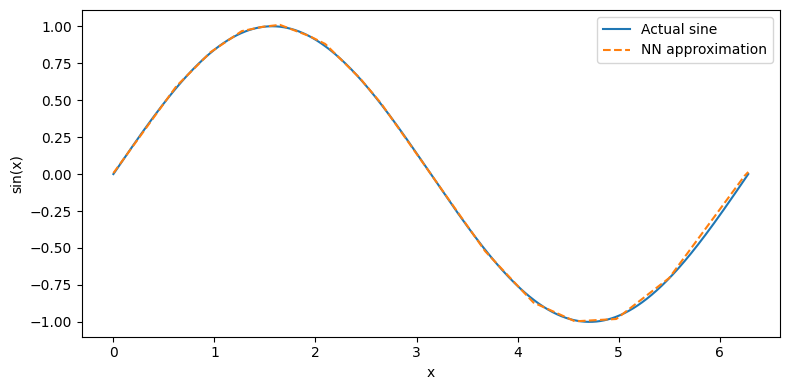

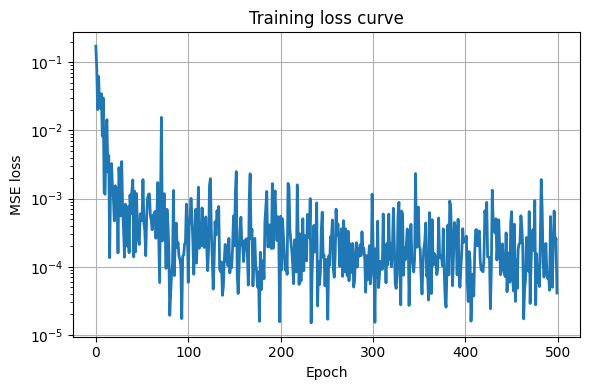

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# ------------------------------------------------------------
# Generate dataset for sine curve approximation
# ------------------------------------------------------------
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Convert numpy arrays to torch tensors and add feature dimension
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Create dataset and dataloader
dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# ------------------------------------------------------------
# Define neural network model
# ------------------------------------------------------------
class SineModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

model = SineModel()

# ------------------------------------------------------------
# Loss function and optimizer
# ------------------------------------------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ------------------------------------------------------------
# Training loop
# ------------------------------------------------------------
num_epochs = 500
loss_history = []

for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

# ------------------------------------------------------------
# Prediction after training
# ------------------------------------------------------------
with torch.no_grad():
    predicted = model(x_tensor).numpy()

# ------------------------------------------------------------
# Plot sine approximation
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Actual sine")
plt.plot(x, predicted, "--", label="NN approximation")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.tight_layout()
plt.savefig("sine_approximation.png")
plt.show()

# ------------------------------------------------------------
# Plot loss curve
# ------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.semilogy(loss_history, lw=2)
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Training loss curve")
plt.grid(True)
plt.tight_layout()
plt.savefig("sine_training_loss.png")
plt.show()
